# Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = 300
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn import tree
sns.set_theme(style = 'darkgrid', palette = 'rainbow')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_Data .csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Basic EDA

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot:>

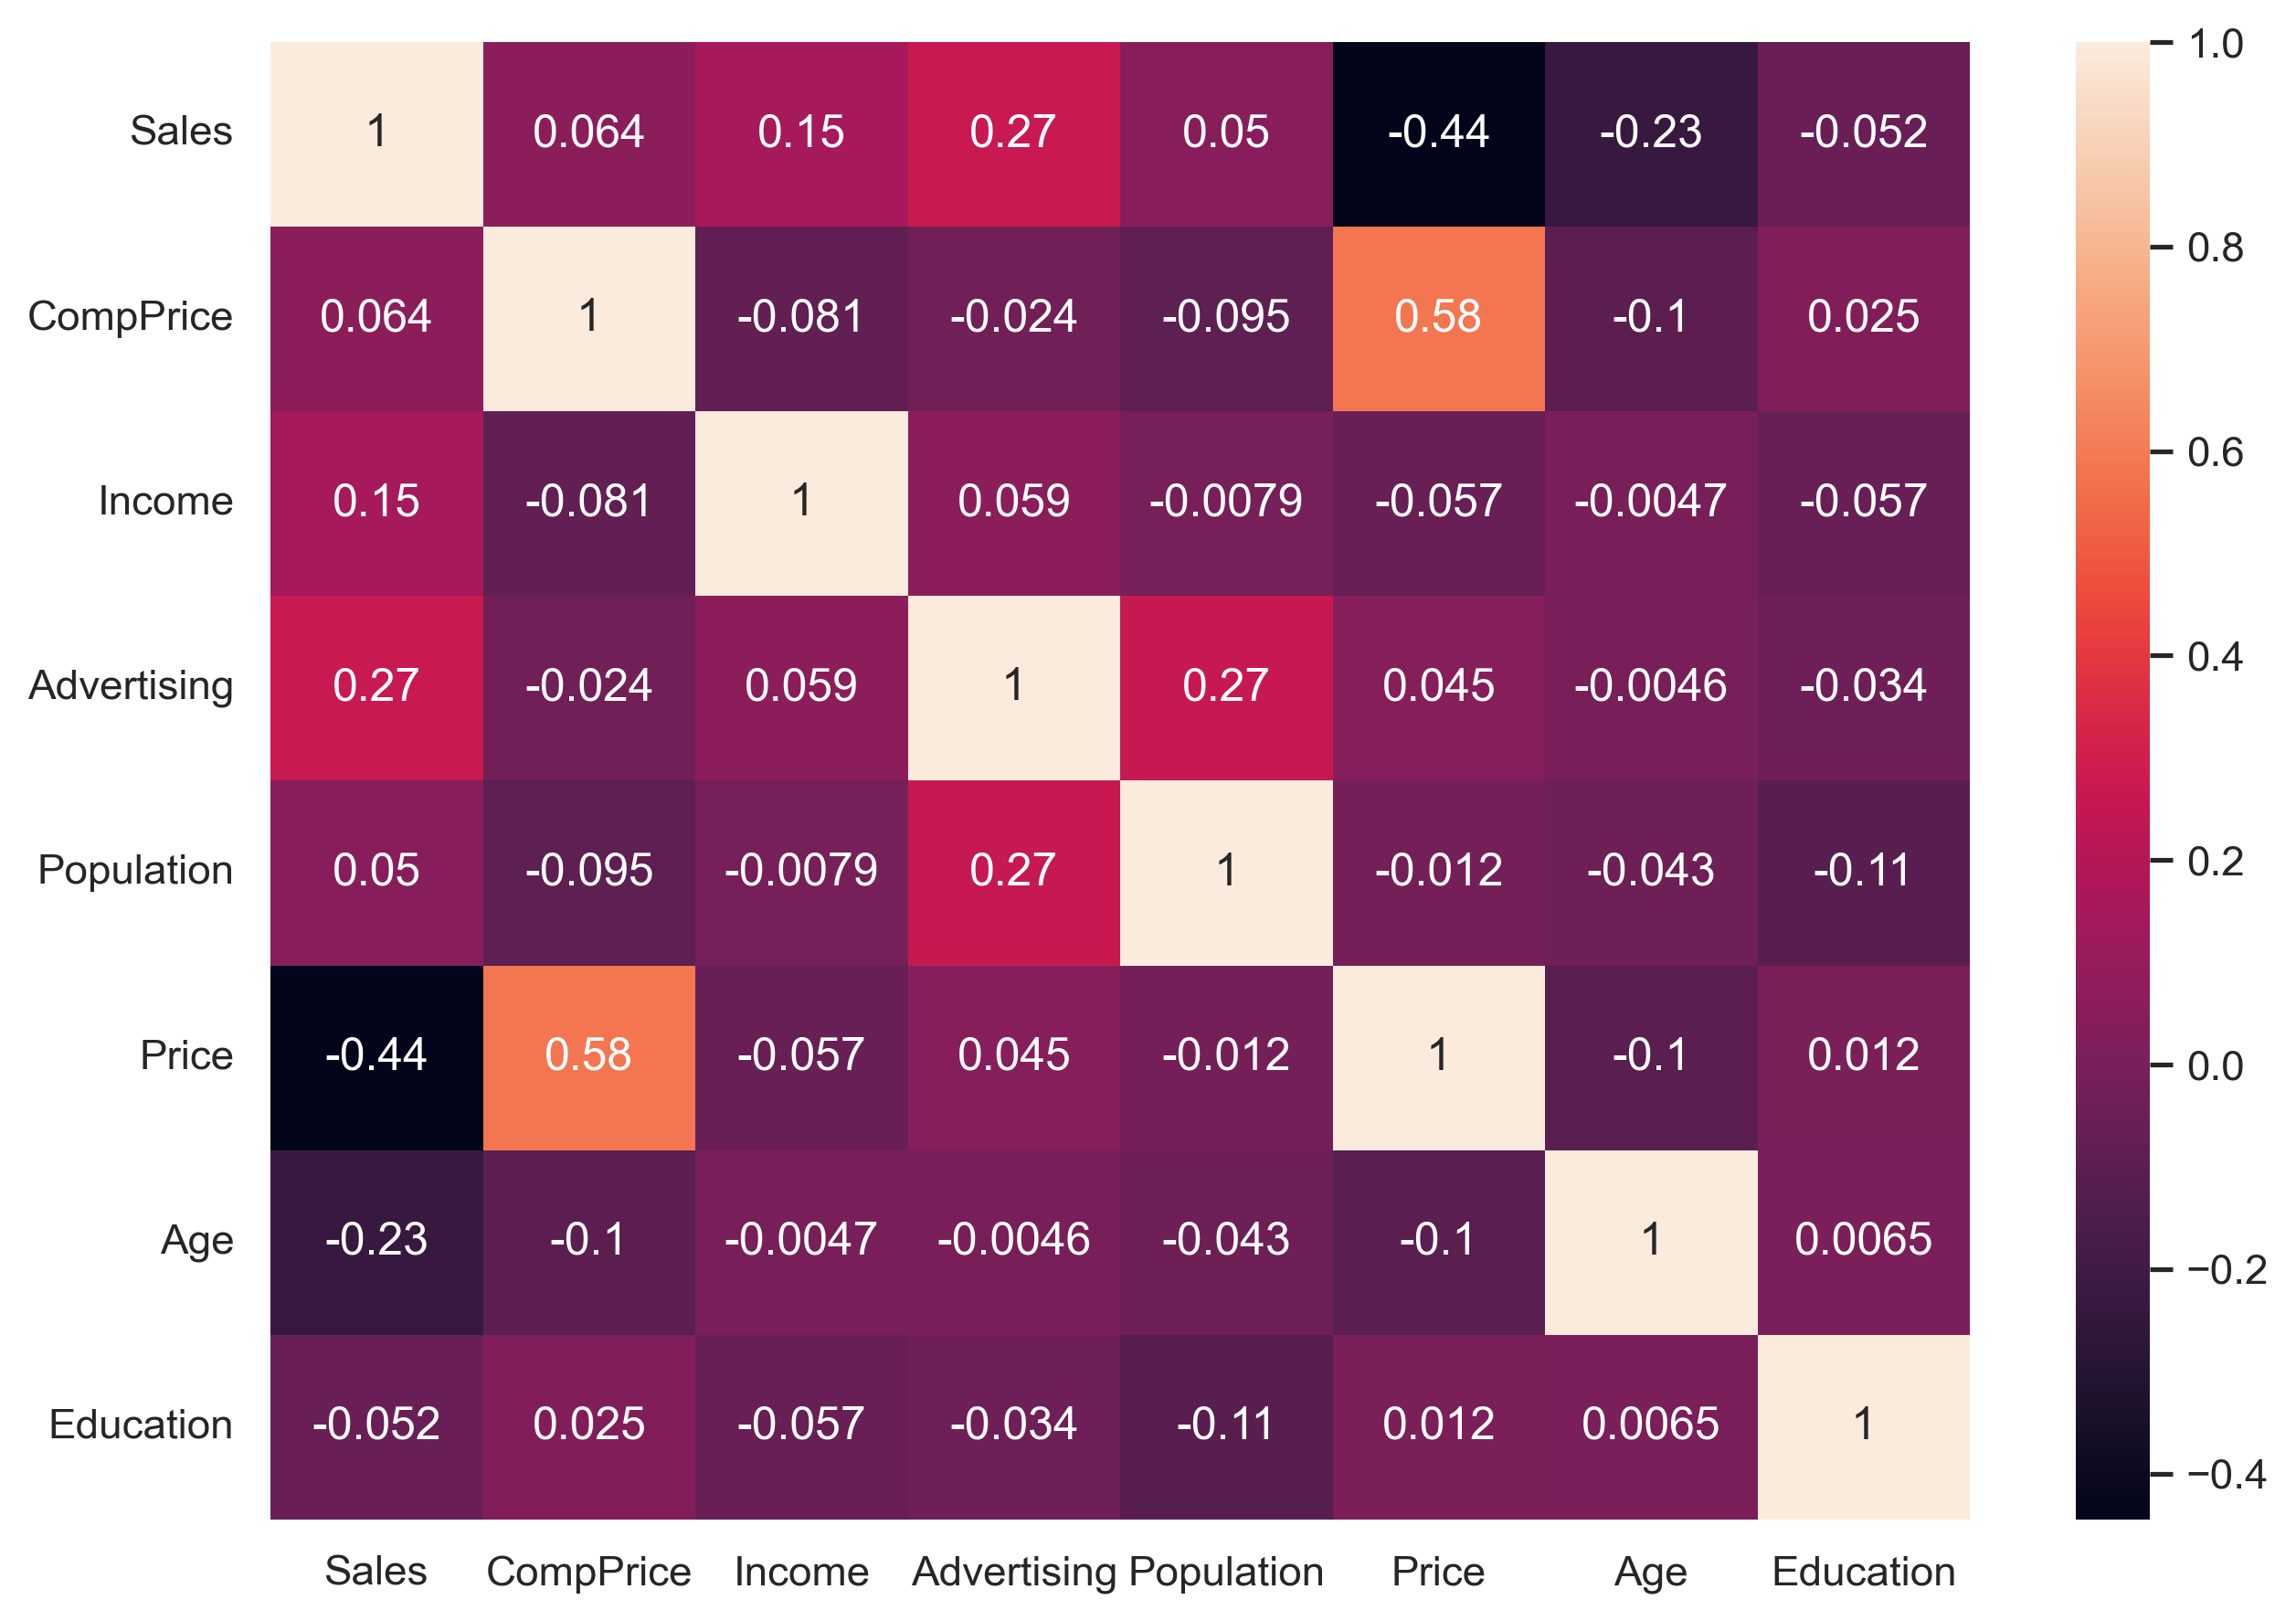

In [6]:
sns.heatmap(df.corr(), annot = True)

In [7]:
# Finding Outlier in Coloumns

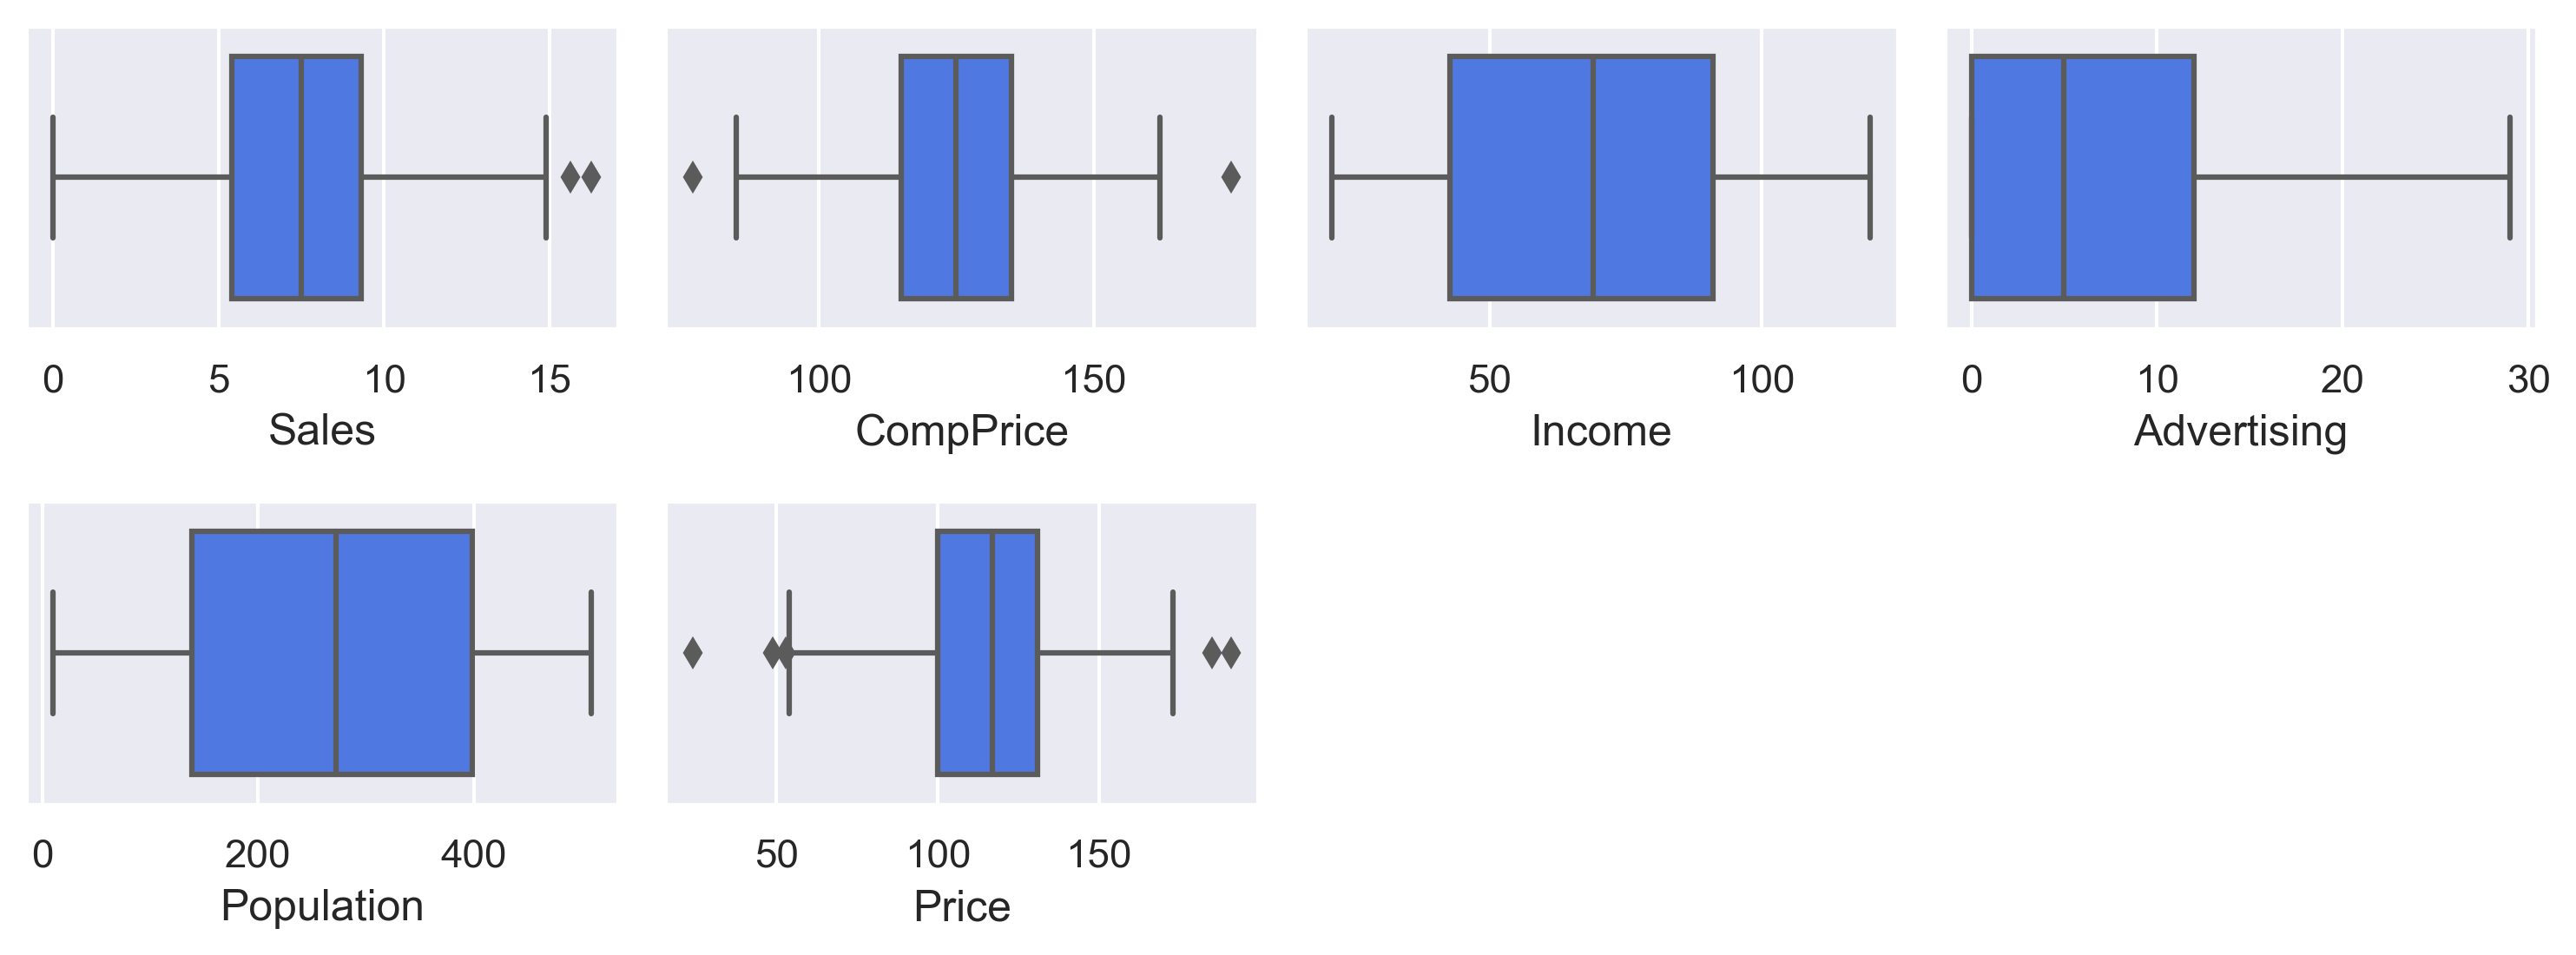

In [8]:
plt.subplot(4,4,1)
sns.boxplot(df['Sales'])

plt.subplot(4,4,2)
sns.boxplot(df['CompPrice'])

plt.subplot(4,4,3)
sns.boxplot(df['Income'])

plt.subplot(4,4,4)
sns.boxplot(df['Advertising'])

plt.subplot(4,4,5)
sns.boxplot(df['Population'])

plt.subplot(4,4,6)
sns.boxplot(df['Price'])

plt.tight_layout()

In [9]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [10]:
outlier_detection(df,'Sales')

(-0.504999999999999, 15.215)

In [11]:
outlier_detection(df,'CompPrice')

(85.0, 165.0)

In [12]:
outlier_detection(df,'Price')

(53.5, 177.5)

In [13]:
df.loc[df['Sales']>15.215, 'Sales']=15.215

In [14]:
df.loc[df['CompPrice']>165, 'CompPrice']=165

In [15]:
df.loc[df['Price']>177.5, 'Price']=177.5

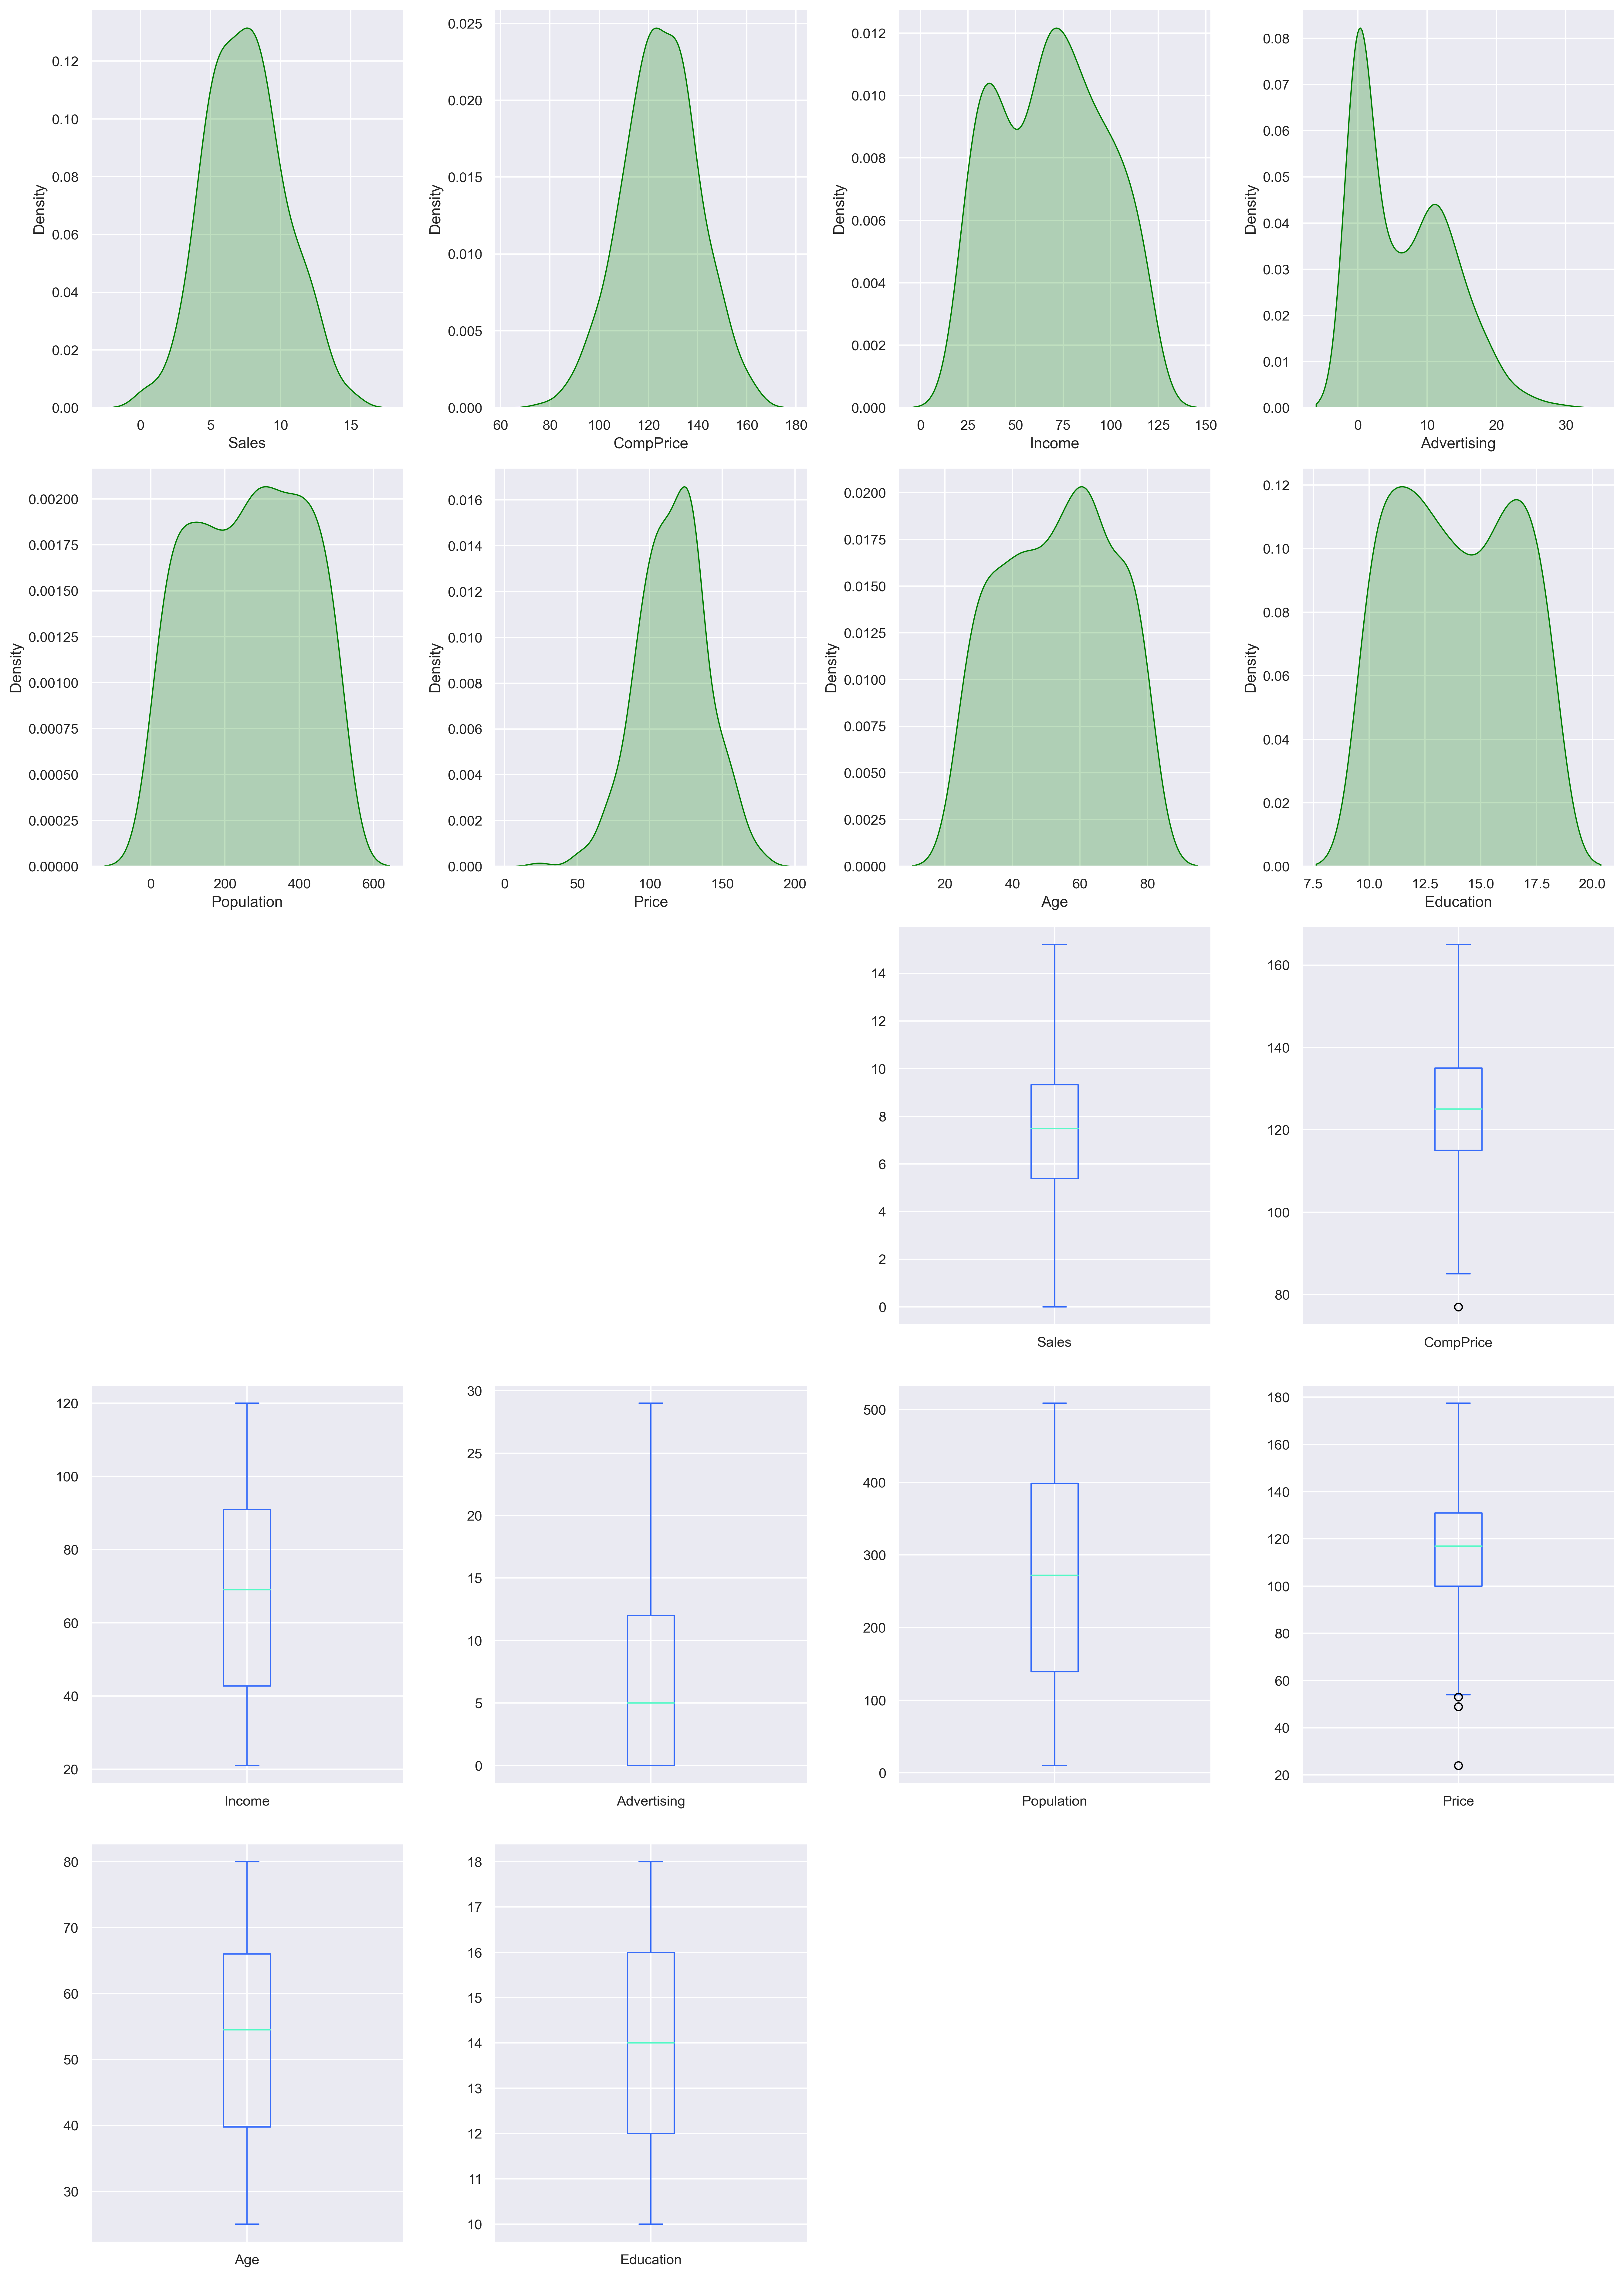

In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(['Sales','CompPrice','Income','Advertising',
                        'Population','Price','Age','Education'],1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

In [17]:
# converting categorical columns into numeric:

In [18]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [19]:
df_cat = df.select_dtypes(object).columns
df_cat

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [20]:
le= LabelEncoder()

df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])

In [21]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120.0,0,42,17,1,1
1,11.22,111,48,16,260,83.0,1,65,10,1,1
2,10.06,113,35,10,269,80.0,2,59,12,1,1
3,7.40,117,100,4,466,97.0,2,55,14,1,1
4,4.15,141,64,3,340,128.0,0,38,13,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 29.8 KB


In [23]:
oe = OrdinalEncoder()

df[df_cat] = oe.fit_transform(df[df_cat])

In [24]:
df['High'] = df.Sales.map(lambda x : 1 if x>7.49
                         else 0)

In [25]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120.0,0.0,42,17,1.0,1.0,1
1,11.22,111,48,16,260,83.0,1.0,65,10,1.0,1.0,1
2,10.06,113,35,10,269,80.0,2.0,59,12,1.0,1.0,1
3,7.40,117,100,4,466,97.0,2.0,55,14,1.0,1.0,0
4,4.15,141,64,3,340,128.0,0.0,38,13,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.0,1.0,33,14,1.0,1.0,1
396,6.14,139,23,3,37,120.0,2.0,55,11,0.0,1.0,0
397,7.41,162,26,12,368,159.0,2.0,40,18,1.0,1.0,0
398,5.94,100,79,7,284,95.0,0.0,50,12,1.0,1.0,0


In [26]:
x = df.iloc[:,1:11]
y = df['High']

In [27]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [29]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        40
           1       0.78      0.72      0.75        40

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [31]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.7625


In [32]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        40
           1       0.78      0.72      0.75        40

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



In [34]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.7625


# Hyperparameter Tunning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
rf= RandomForestClassifier()

param= {
    'criterion': ['gini','entropy'],
    'max_depth':[1,2,3,4,5,6] 
}

In [37]:
grid = GridSearchCV(RandomForestClassifier(),param)

In [38]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [39]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [40]:
rf = RandomForestClassifier(criterion='gini',max_depth=6, random_state=143)

rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [41]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  0.975
Testing Accuracy:  0.7625
